# Name    : Gobinath Periyasamy

# Roll No : CS21M501

# Problem (1) 

## i. (i) Determine which probabilisitic mixture could have generated this data (It is not a Gaussian mixture). Derive the EM algorithm for your choice of mixture and show your calculations. Write a piece of code to implement the algorithm you derived by setting the number of mixtures K = 4. Plot the log-likelihood (averaged over 100 random initializations) as a function of iterations.


### Solution : 

### Determine which probabilisitic mixture could have generated this data (It is not a Gaussian mixture) :

#### The given Probabilisitic Mixture is

### """Exponential Distribution"""

In [1]:
# import libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

In [2]:
# import Excel A2Q1 data:
df = pd.read_csv("A2Q1.csv",header = None,prefix= 'column')
df

,column0
0,0.57539
1,7.69890
2,5.17310
3,1.00350
4,0.21469
...,...
995,39.90800
996,2.77390
997,4.18190
998,63.89000


### Plotting histogram to see how the Density of the data is distributed

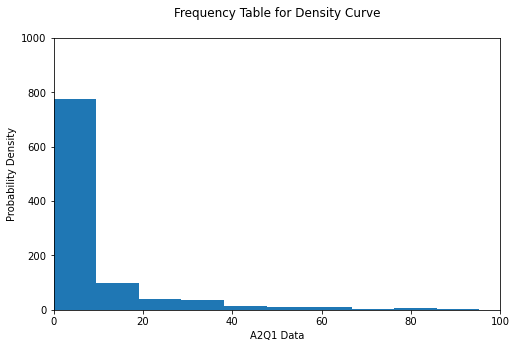

In [3]:
# Get Historgram to know how the Density is distributed
plt.figure(figsize = (8,5))
plt.hist(df['column0'])
plt.title('Frequency Table for Density Curve\n')
plt.xlabel('A2Q1 Data')
plt.ylabel('Probability Density')
plt.xlim(0,100)
plt.ylim(0,1000)
plt.show()

### To Draw smooth Probability Density Curve for the above Histogram

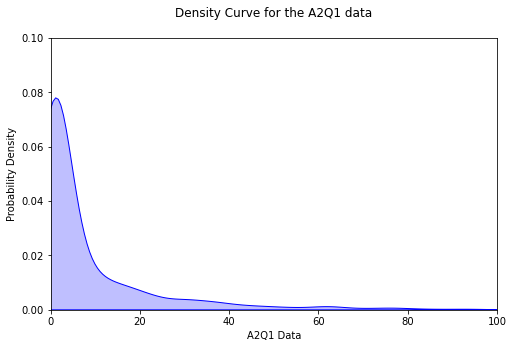

In [4]:
# Draw smooth Density Curve of Probability Distribution for the above Histogram

plt.figure(figsize = (8,5))

#### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
sb.kdeplot(df['column0'], color='b', shade=True)

# Setting the X and Y Label
plt.xlabel('A2Q1 Data')
plt.ylabel('Probability Density')
plt.xlim(0,100)
plt.ylim(0,0.1)
plt.title('Density Curve for the A2Q1 data\n')
# visualizing plot using matplotlib.pyplot library
plt.show()

## So the Above Curve We can conclude that the probabilisitic mixture could have generated this data is

# """Exponential Probabilisitic Mixture"""


##### - No Negative Values
##### - Change in smooth curve for data| is Exponential

Exponential distribution is used for describing time till next event e.g. failure/success etc.
Our Data describes the curve till the next event. So Our data is Exponential.

### --------------------------------------------------xxxx--------------------------------------------------

### Derive the EM algorithm for your choice of mixture and show your calculations.

In [5]:
# Exponential PDF

def exponential_pdf(data, mean):
    a1 = 1/(mean)
    a2 = np.exp((-(a1))*data)
    return a1*a2
    

Random Means to Start with :  8.85 3.62 9.37 2.88


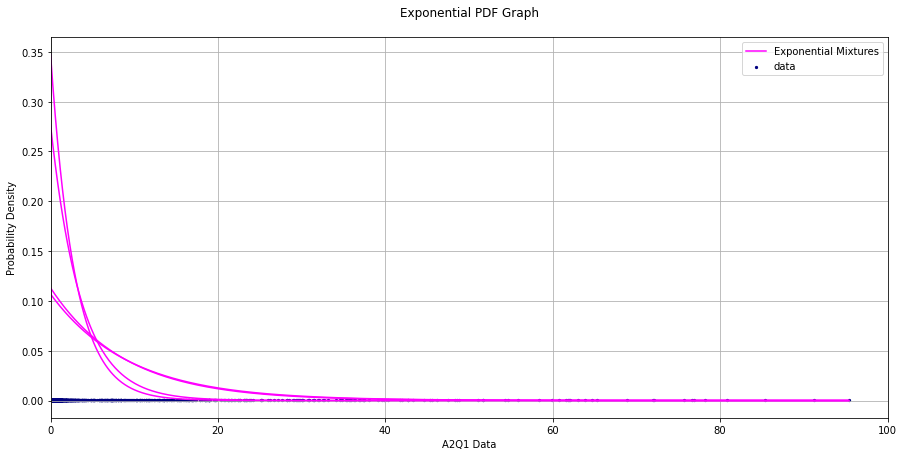

In [6]:
# We have 1000 data points and K = 4

n_samples = 250

# Random Mean values to start with
# mean0 = round(random.uniform(7,10),2)
# mean1 = round(random.uniform(1,4),2)
# mean2 = round(random.uniform(7,10),2)
# mean3 = round(random.uniform(1,5),2)

mean0,mean1, mean2, mean3 = 8.85, 3.62, 9.37, 2.88

print("Random Means to Start with : ",mean0,mean1,mean2,mean3)

X = df.to_numpy()
np.random.shuffle(X)

# Set the Visualize in plt

starts = np.linspace(np.min(X),np.max(X),1000)

#mean = np.mean(X)

#print(mean)
# Visualize the training data:
plt.figure(figsize = (15,7))

# Setting the X and Y Label
plt.xlabel('A2Q1 Data')
plt.ylabel('Probability Density')
plt.title('Exponential PDF Graph\n')
plt.xlim(0,100)

plt.scatter(X,[0.00005]*len(X), color = 'navy', s=5,label = 'data')
#plt.scatter(df.index,df['column0'], color = 'navy', s=20,marker = 2)
# visualizing plot using matplotlib.pyplot library

plt.plot(starts, exponential_pdf(starts,mean0),color = 'magenta',label = 'Exponential Mixtures')
plt.plot(starts, exponential_pdf(starts,mean1),color = 'magenta')
plt.plot(starts, exponential_pdf(starts,mean2),color = 'magenta')
plt.plot(starts, exponential_pdf(starts,mean3),color = 'magenta')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()



### Write a piece of code to implement the algorithm you derived by setting the number of mixtures K = 4.

In [7]:
# Finding the mix_prob

a = 2
b = 12

k = 4
mix_prob = np.ones((k)) /k
means = np.random.beta(a,b,k)
variance = np.random.random_sample(size=k)
print(means,variance)

[0.15385134 0.11264518 0.01262341 0.31001687] [0.87157755 0.9428767  0.75377087 0.89473965]


 ### Plot the log-likelihood (averaged over 100 random initializations) as a function of iterations.

8.85 3.62 9.37 2.88
[0.15385134 0.11264518 0.01262341 0.31001687]


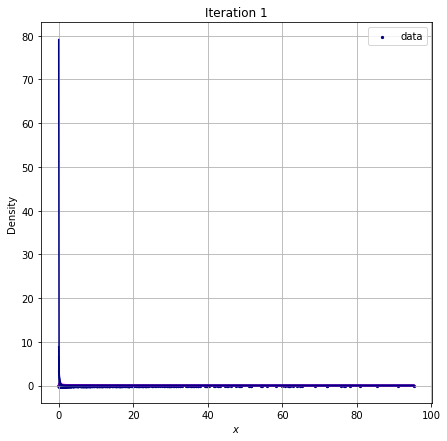

8.85 3.62 9.37 2.88
[0.39499336 0.24929011 0.01533779 1.49672518]


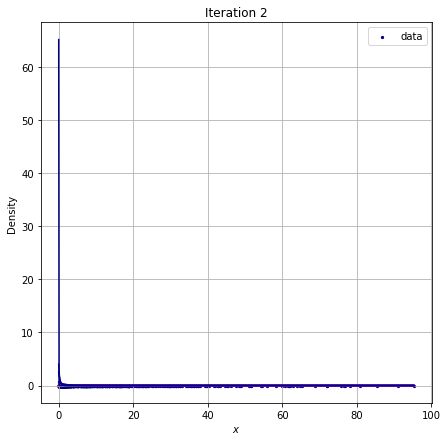

8.85 3.62 9.37 2.88
[0.48249356 0.31320045 0.01350436 4.64142531]


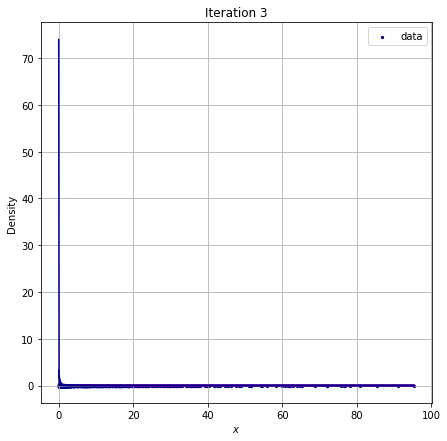

8.85 3.62 9.37 2.88
[0.51139556 0.3605122  0.01130382 8.93883561]


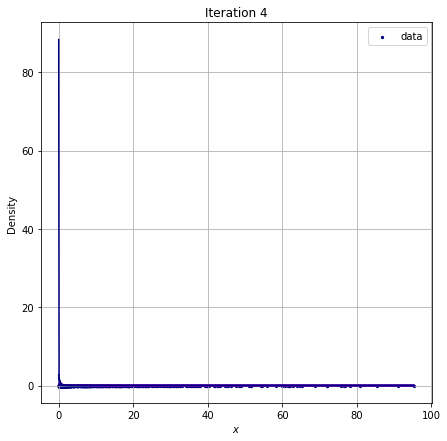

8.85 3.62 9.37 2.88
[5.79018223e-01 4.37551233e-01 9.16594011e-03 1.08112093e+01]


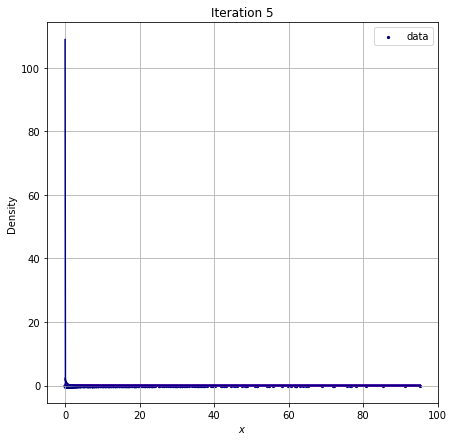

8.85 3.62 9.37 2.88
[6.72991441e-01 5.36336222e-01 7.17676786e-03 1.23182709e+01]


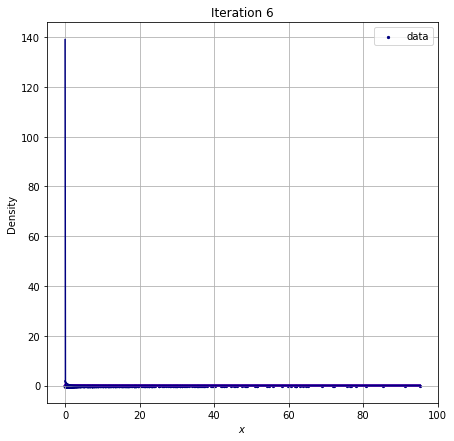

8.85 3.62 9.37 2.88
[7.65954813e-01 6.35565754e-01 5.64075244e-03 1.38062498e+01]


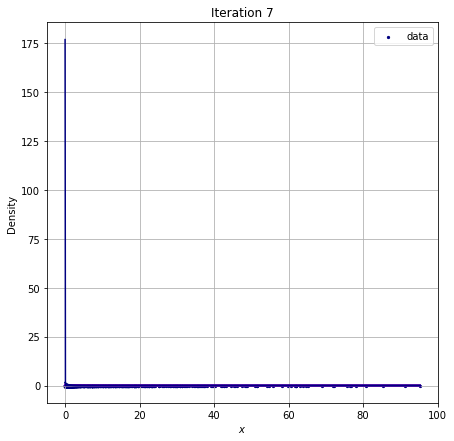

8.85 3.62 9.37 2.88
[8.43899166e-01 7.21579583e-01 4.61710582e-03 1.50935940e+01]


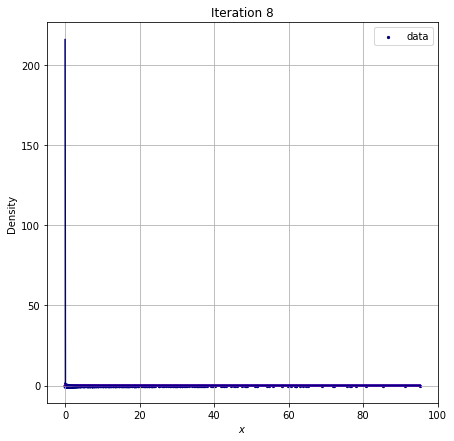

8.85 3.62 9.37 2.88
[9.02670849e-01 7.89097538e-01 3.96848018e-03 1.60771508e+01]


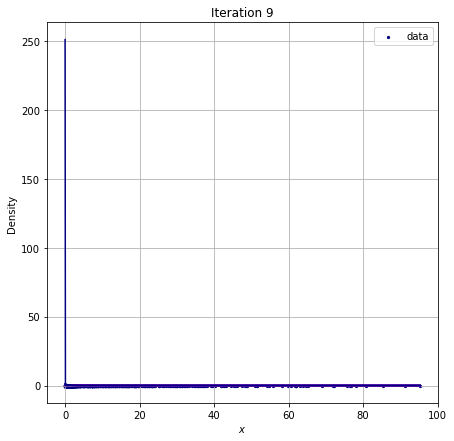

8.85 3.62 9.37 2.88
[9.43837596e-01 8.38743667e-01 3.55195953e-03 1.67605645e+01]


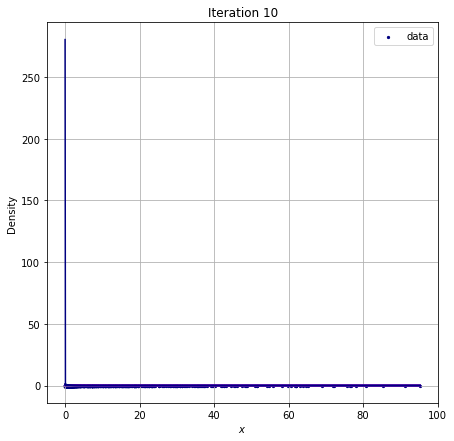

8.85 3.62 9.37 2.88
[9.71160527e-01 8.73881867e-01 3.27390894e-03 1.72077231e+01]


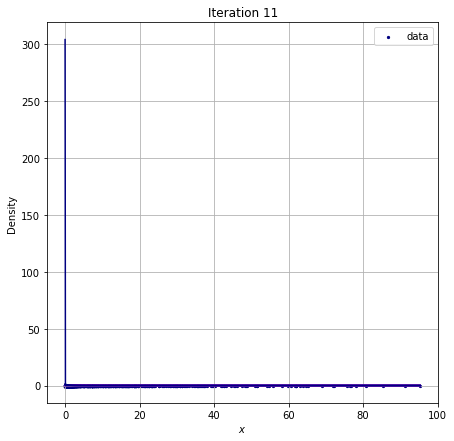

8.85 3.62 9.37 2.88
[9.88505389e-01 8.98326668e-01 3.07888535e-03 1.74909756e+01]


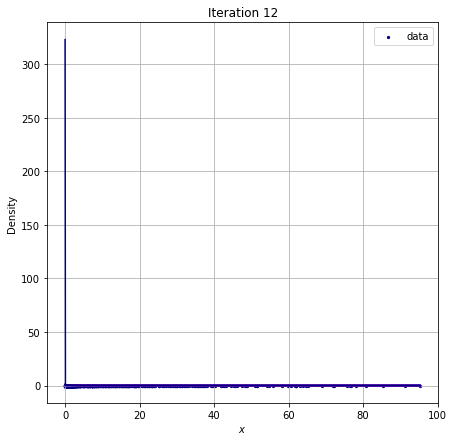

8.85 3.62 9.37 2.88
[9.99044939e-01 9.15321215e-01 2.93435053e-03 1.76676506e+01]


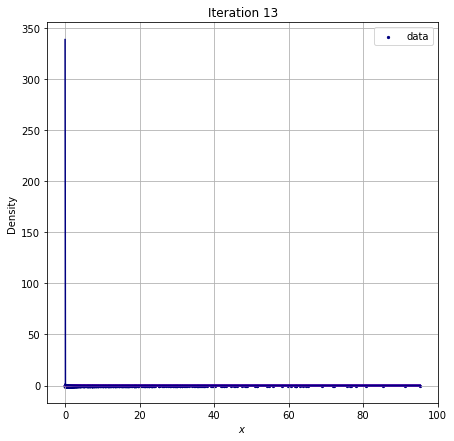

8.85 3.62 9.37 2.88
[1.00511772e+00 9.27292142e-01 2.82096063e-03 1.77770757e+01]


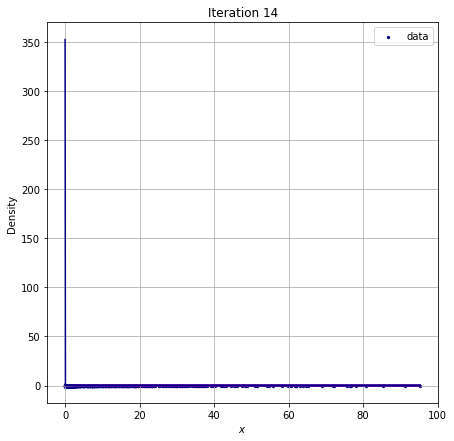

8.85 3.62 9.37 2.88
[1.00834108e+00 9.35932312e-01 2.72698021e-03 1.78445966e+01]


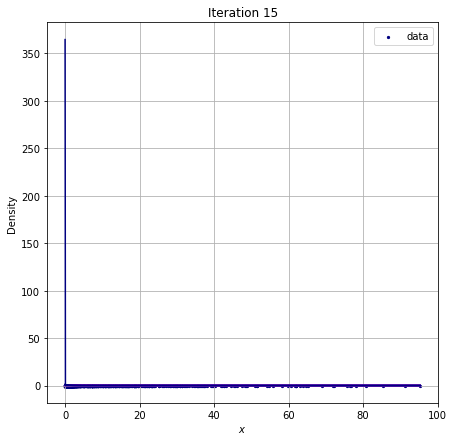

8.85 3.62 9.37 2.88
[1.00978864e+00 9.42374739e-01 2.64508578e-03 1.78861317e+01]


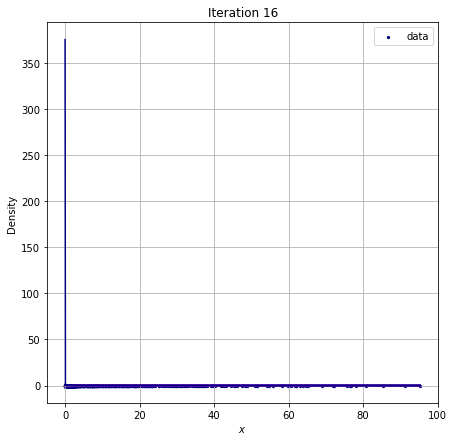

8.85 3.62 9.37 2.88
[1.01015380e+00 9.47359246e-01 2.57051540e-03 1.79115816e+01]


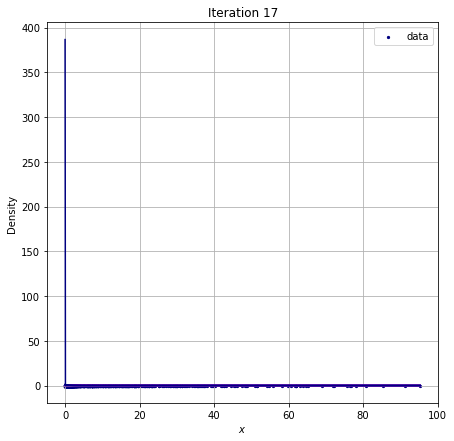

8.85 3.62 9.37 2.88
[1.00987589e+00 9.51362231e-01 2.49997750e-03 1.79270841e+01]


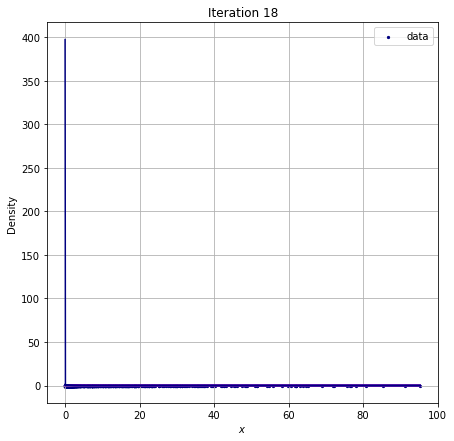

8.85 3.62 9.37 2.88
[1.00922912e+00 9.54688444e-01 2.43098676e-03 1.79364403e+01]


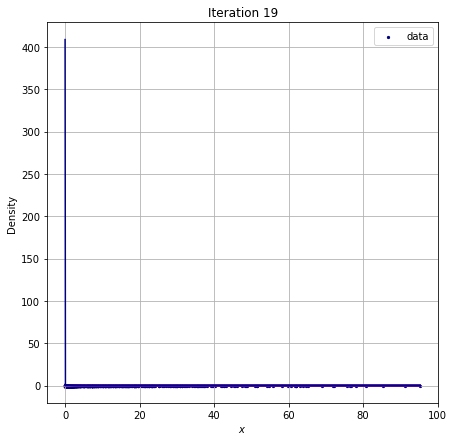

8.85 3.62 9.37 2.88
[1.00838232e+00 9.57532579e-01 2.36143311e-03 1.79420036e+01]


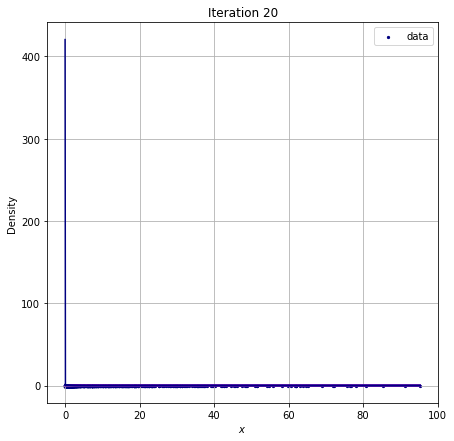

8.85 3.62 9.37 2.88
[1.00743769e+00 9.60019326e-01 2.28926434e-03 1.79452295e+01]


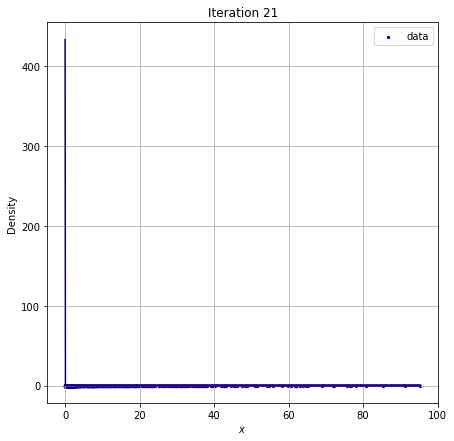

8.85 3.62 9.37 2.88
[1.00645557e+00 9.62228916e-01 2.21219770e-03 1.79470170e+01]


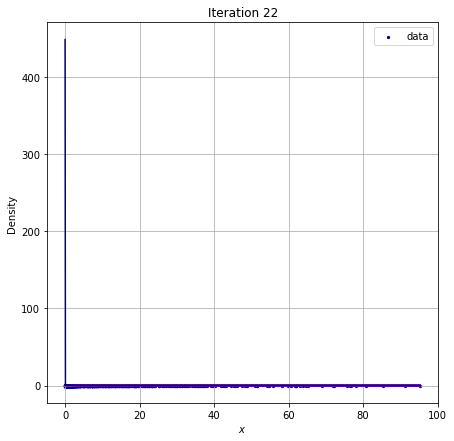

8.85 3.62 9.37 2.88
[1.00546990e+00 9.64213139e-01 2.12738152e-03 1.79479194e+01]


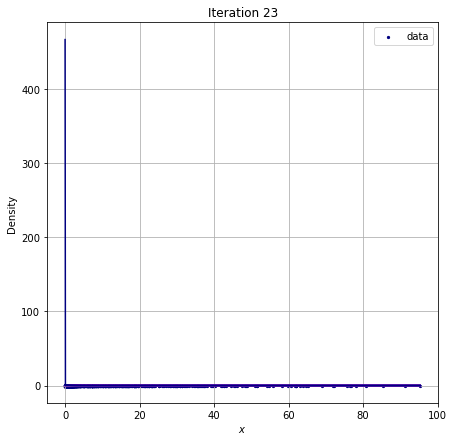

8.85 3.62 9.37 2.88
[1.00449776e+00 9.66005191e-01 2.03090151e-03 1.79482751e+01]


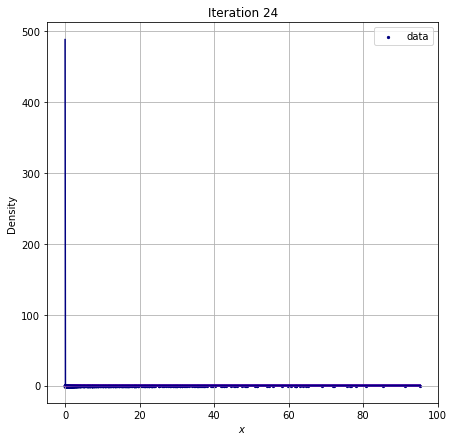

8.85 3.62 9.37 2.88
[1.00354485e+00 9.67625468e-01 1.91694757e-03 1.79482876e+01]


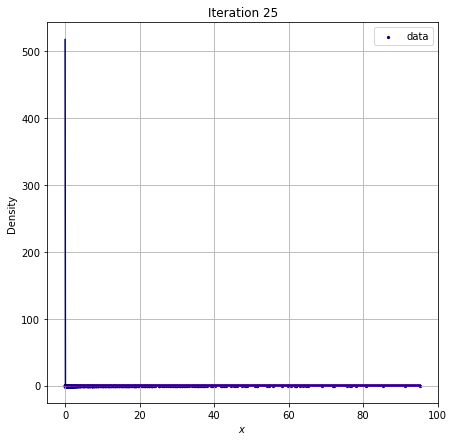

8.85 3.62 9.37 2.88
[1.00260839e+00 9.69084557e-01 1.77626806e-03 1.79480755e+01]


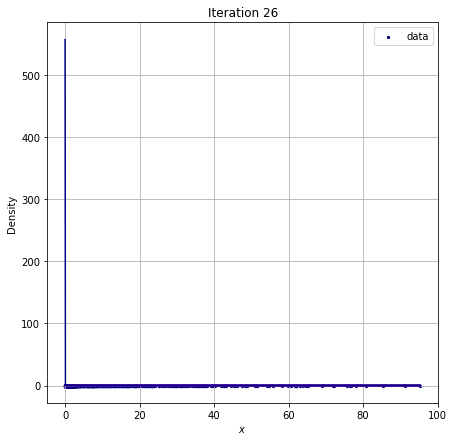

8.85 3.62 9.37 2.88
[1.00167786e+00 9.70384153e-01 1.59312760e-03 1.79477009e+01]


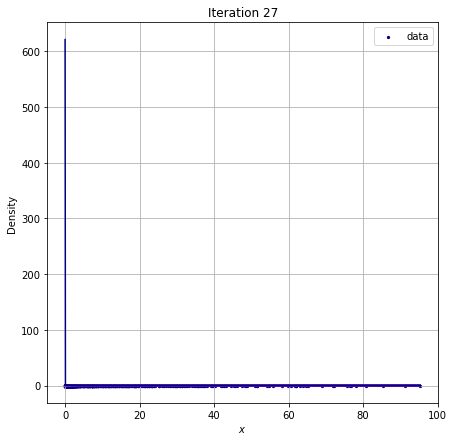

8.85 3.62 9.37 2.88
[1.00073480e+00 9.71516900e-01 1.33939723e-03 1.79471873e+01]


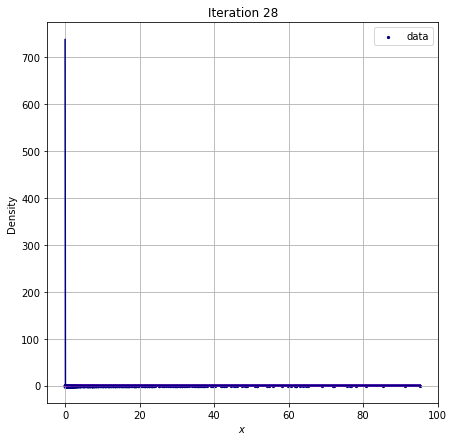

8.85 3.62 9.37 2.88
[9.99758729e-01 9.72472341e-01 9.67598502e-04 1.79465343e+01]


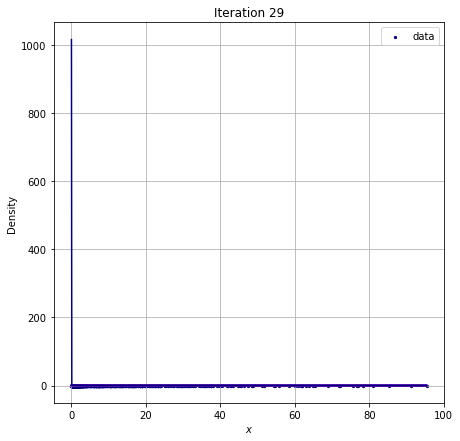

8.85 3.62 9.37 2.88
[9.98795599e-01 9.73305683e-01 4.62494350e-04 1.79457907e+01]


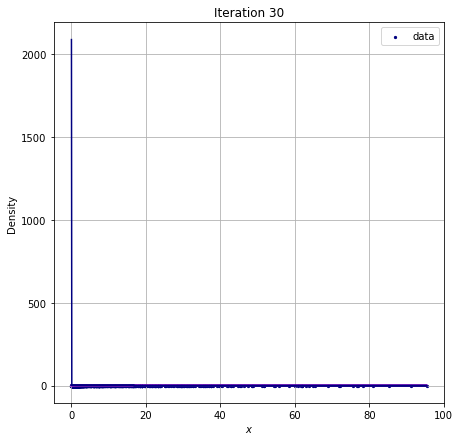

8.85 3.62 9.37 2.88
[9.98211738e-01 9.74393502e-01 1.94977159e-04 1.79452962e+01]


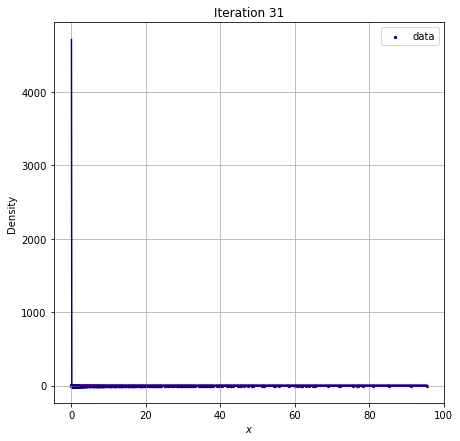

8.85 3.62 9.37 2.88
[9.97776902e-01 9.75520715e-01 1.88547329e-04 1.79447391e+01]


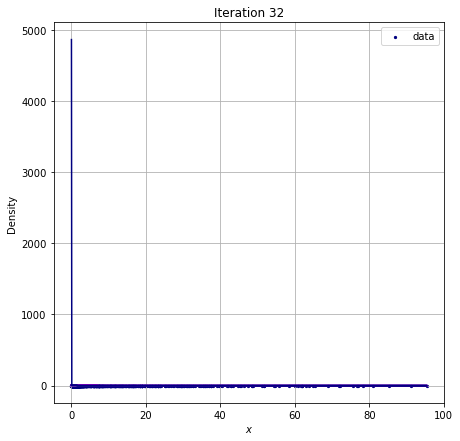

8.85 3.62 9.37 2.88
[9.97324122e-01 9.76528693e-01 1.88455148e-04 1.79443308e+01]


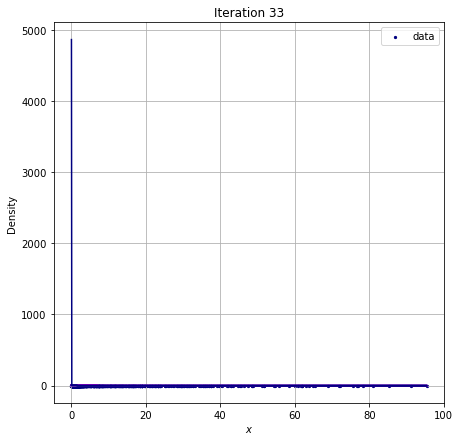

8.85 3.62 9.37 2.88
[9.96889716e-01 9.77459044e-01 1.88466895e-04 1.79441421e+01]


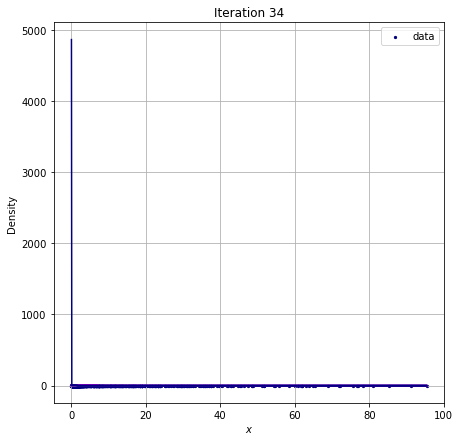

8.85 3.62 9.37 2.88
[9.96482698e-01 9.78326826e-01 1.88469456e-04 1.79440308e+01]


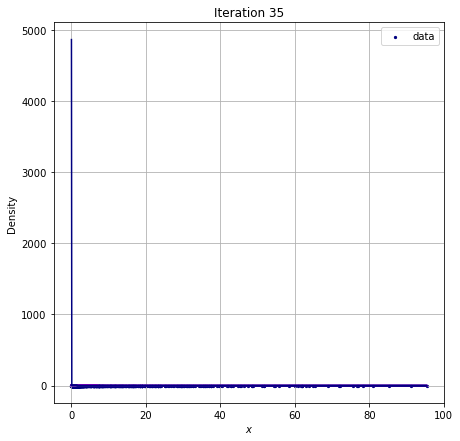

8.85 3.62 9.37 2.88
[9.96103257e-01 9.79138145e-01 1.88469891e-04 1.79439517e+01]


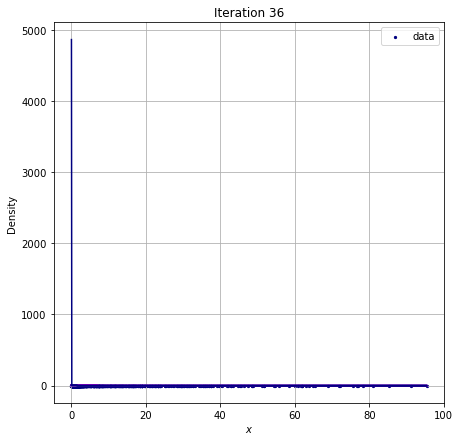

8.85 3.62 9.37 2.88
[9.95749720e-01 9.79896909e-01 1.88469979e-04 1.79438904e+01]


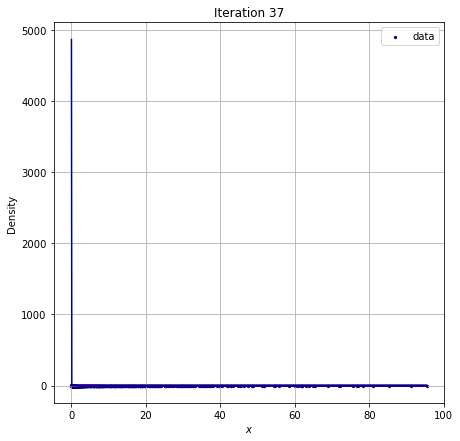

8.85 3.62 9.37 2.88
[9.95420212e-01 9.80606458e-01 1.88470013e-04 1.79438409e+01]


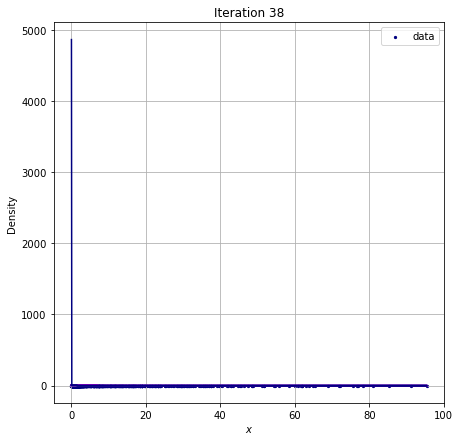

8.85 3.62 9.37 2.88
[9.95112975e-01 9.81269898e-01 1.88470037e-04 1.79438000e+01]


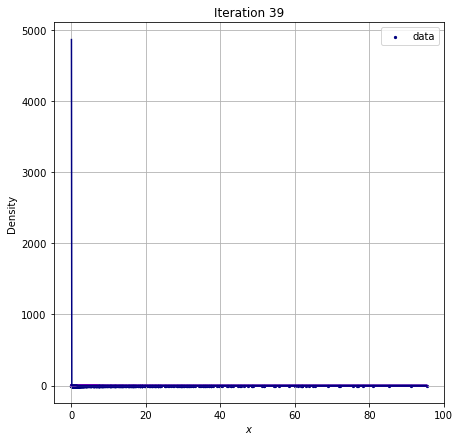

8.85 3.62 9.37 2.88
[9.94826407e-01 9.81890162e-01 1.88470057e-04 1.79437657e+01]


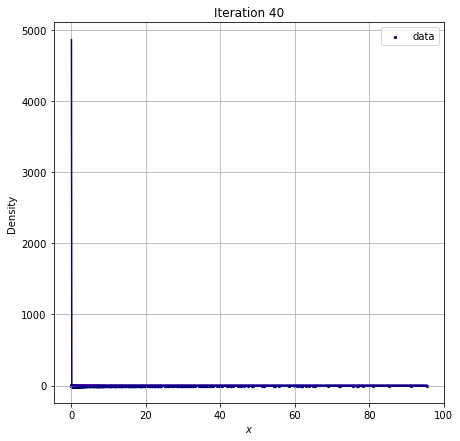

8.85 3.62 9.37 2.88
[9.94559047e-01 9.82470019e-01 1.88470075e-04 1.79437367e+01]


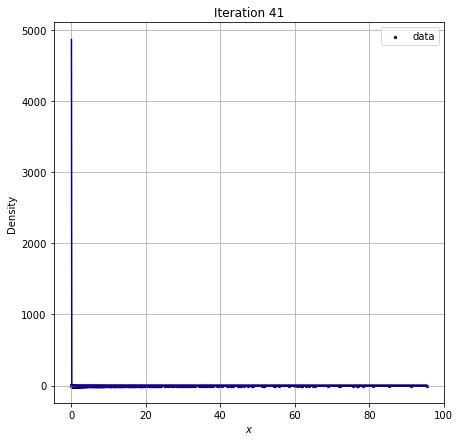

8.85 3.62 9.37 2.88
[9.94309555e-01 9.83012077e-01 1.88470092e-04 1.79437119e+01]


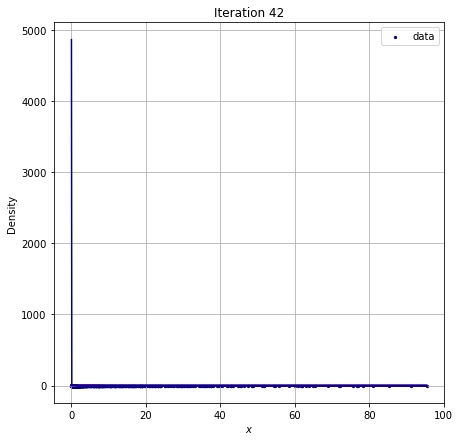

8.85 3.62 9.37 2.88
[9.94076699e-01 9.83518783e-01 1.88470106e-04 1.79436906e+01]


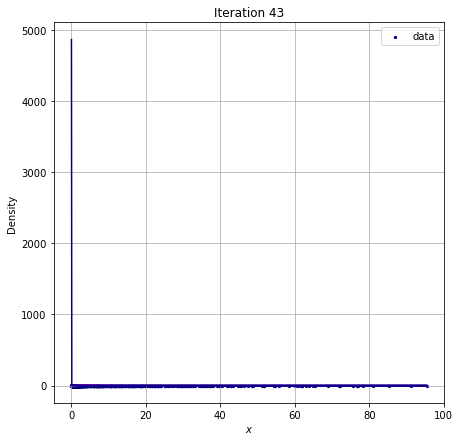

8.85 3.62 9.37 2.88
[9.93859339e-01 9.83992435e-01 1.88470119e-04 1.79436722e+01]


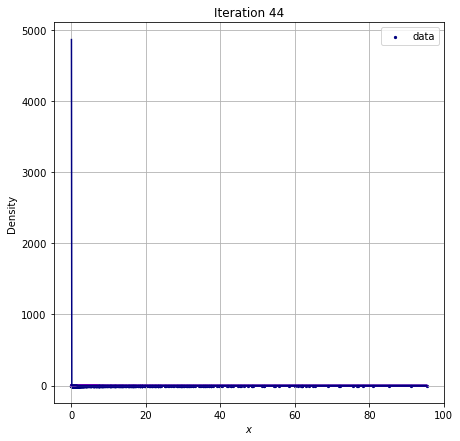

8.85 3.62 9.37 2.88
[9.93656421e-01 9.84435182e-01 1.88470130e-04 1.79436563e+01]


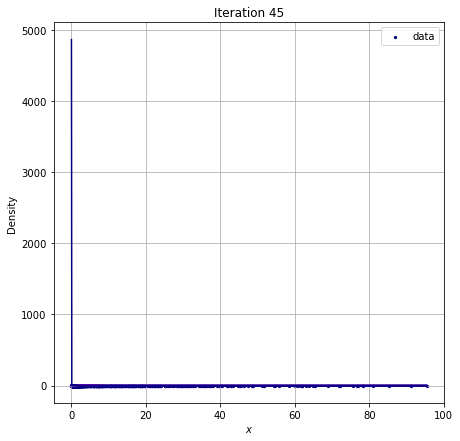

8.85 3.62 9.37 2.88
[9.93466966e-01 9.84849037e-01 1.88470140e-04 1.79436424e+01]


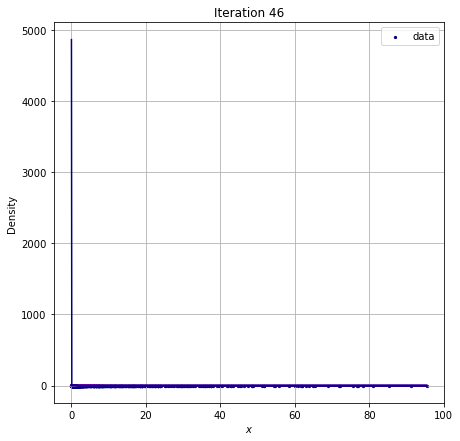

8.85 3.62 9.37 2.88
[9.93290066e-01 9.85235884e-01 1.88470148e-04 1.79436304e+01]


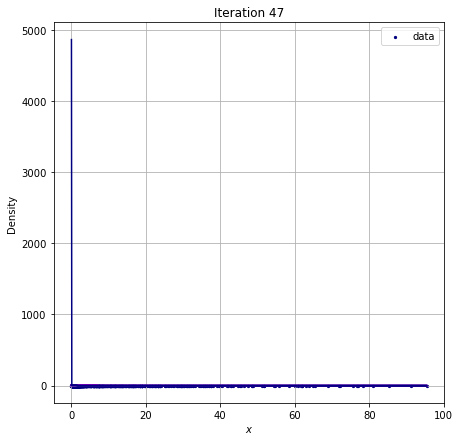

8.85 3.62 9.37 2.88
[9.93124876e-01 9.85597483e-01 1.88470156e-04 1.79436200e+01]


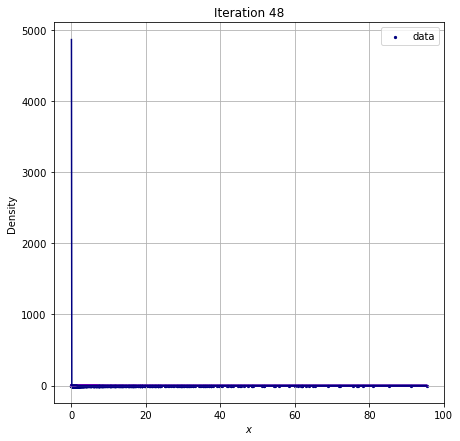

8.85 3.62 9.37 2.88
[9.92970610e-01 9.85935483e-01 1.88470162e-04 1.79436108e+01]


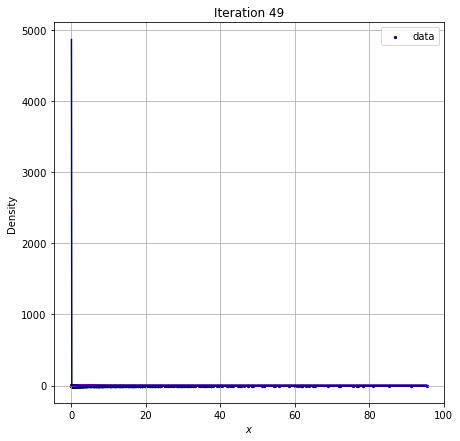

8.85 3.62 9.37 2.88
[9.92826536e-01 9.86251422e-01 1.88470168e-04 1.79436029e+01]


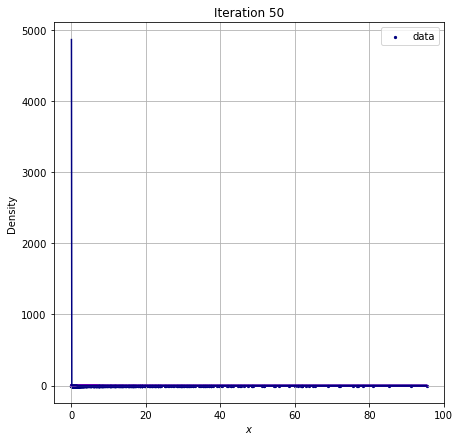

8.85 3.62 9.37 2.88
[9.92691973e-01 9.86546740e-01 1.88470173e-04 1.79435959e+01]


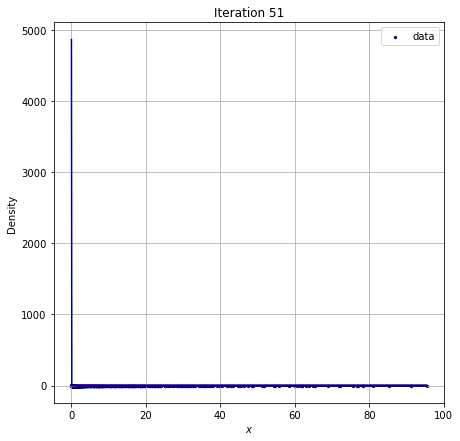

8.85 3.62 9.37 2.88
[9.92566287e-01 9.86822784e-01 1.88470177e-04 1.79435899e+01]


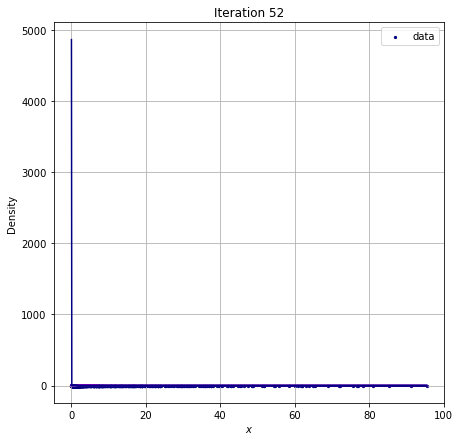

8.85 3.62 9.37 2.88
[9.92448885e-01 9.87080810e-01 1.88470181e-04 1.79435846e+01]


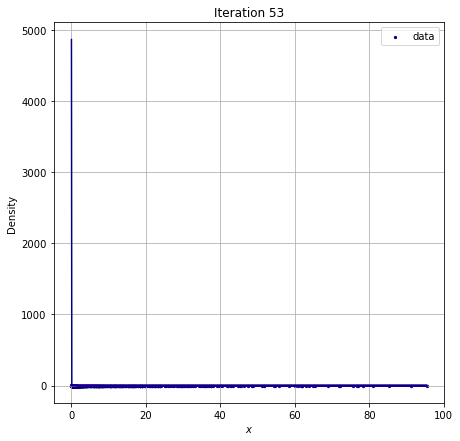

8.85 3.62 9.37 2.88
[9.92339217e-01 9.87321995e-01 1.88470185e-04 1.79435800e+01]


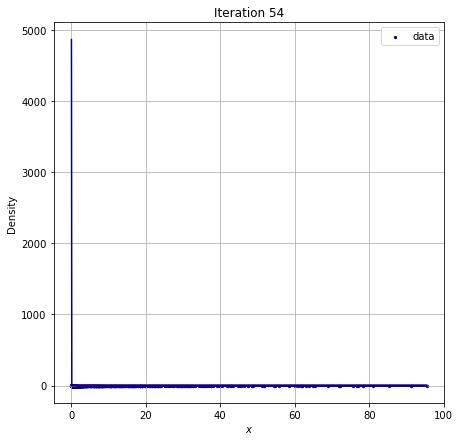

8.85 3.62 9.37 2.88
[9.92236769e-01 9.87547439e-01 1.88470188e-04 1.79435760e+01]


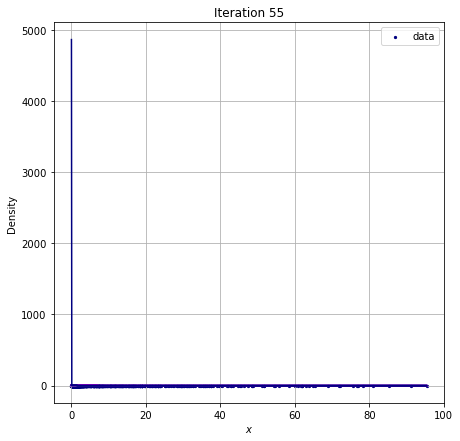

8.85 3.62 9.37 2.88
[9.92141061e-01 9.87758168e-01 1.88470190e-04 1.79435725e+01]


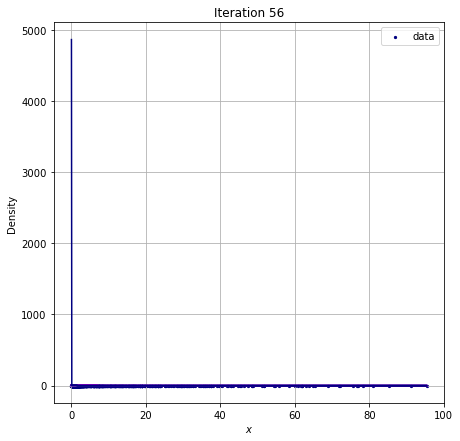

8.85 3.62 9.37 2.88
[9.92051648e-01 9.87955143e-01 1.88470192e-04 1.79435694e+01]


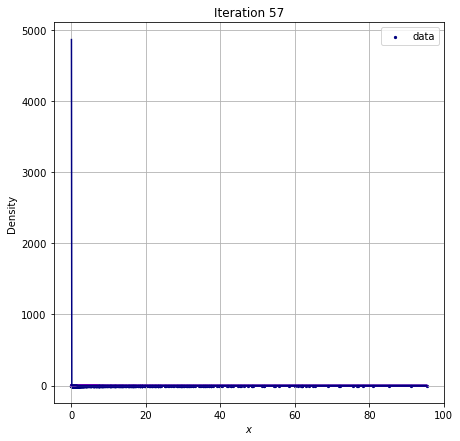

8.85 3.62 9.37 2.88
[9.91968112e-01 9.88139262e-01 1.88470194e-04 1.79435667e+01]


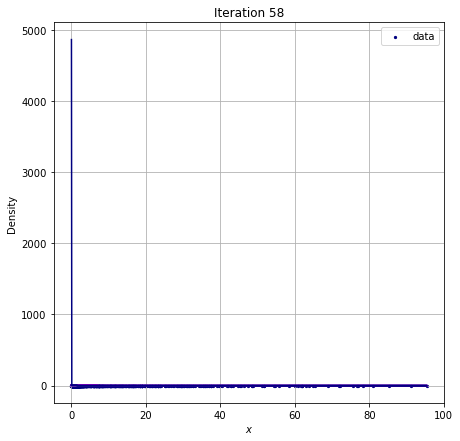

8.85 3.62 9.37 2.88
[9.91890063e-01 9.88311363e-01 1.88470196e-04 1.79435644e+01]


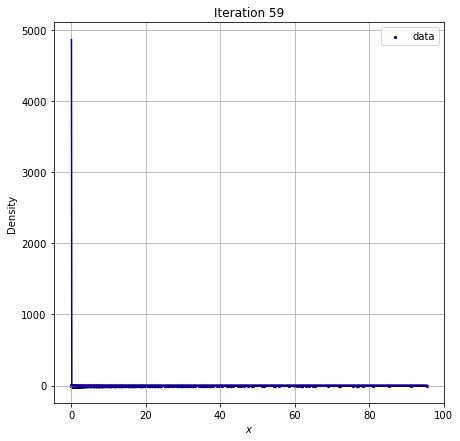

8.85 3.62 9.37 2.88
[9.91817141e-01 9.88472232e-01 1.88470197e-04 1.79435623e+01]


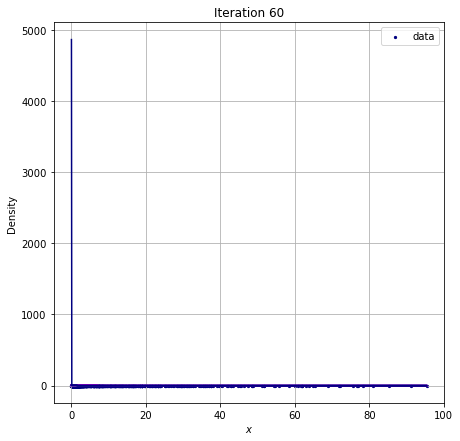

8.85 3.62 9.37 2.88
[9.91749005e-01 9.88622602e-01 1.88470199e-04 1.79435605e+01]


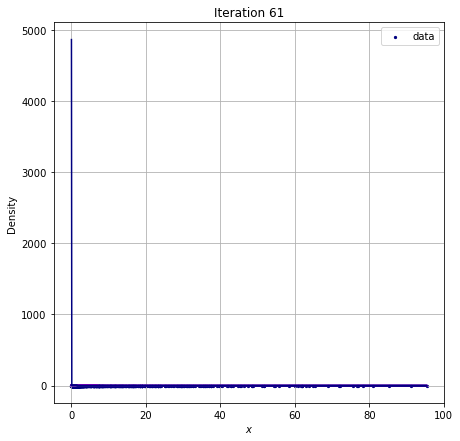

8.85 3.62 9.37 2.88
[9.91685340e-01 9.88763156e-01 1.88470200e-04 1.79435590e+01]


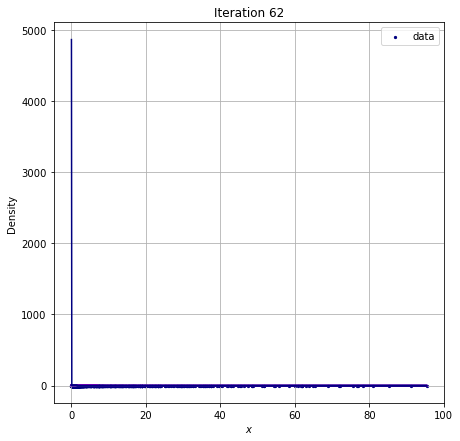

8.85 3.62 9.37 2.88
[9.91625852e-01 9.88894537e-01 1.88470201e-04 1.79435576e+01]


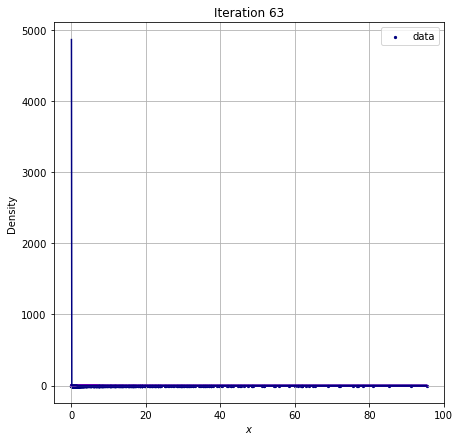

8.85 3.62 9.37 2.88
[9.91570264e-01 9.89017344e-01 1.88470202e-04 1.79435564e+01]


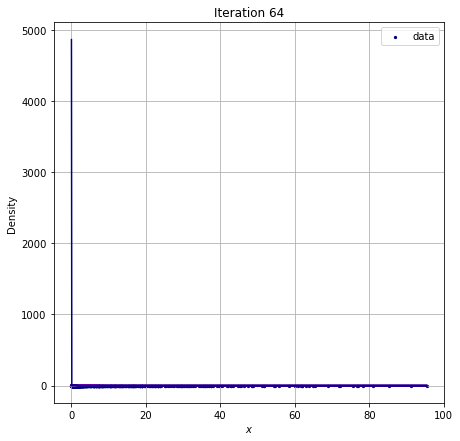

8.85 3.62 9.37 2.88
[9.91518321e-01 9.89132134e-01 1.88470203e-04 1.79435554e+01]


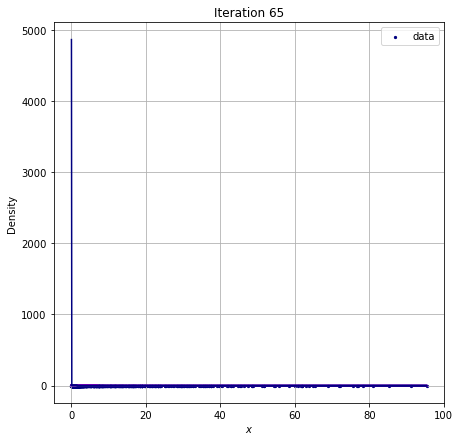

8.85 3.62 9.37 2.88
[9.91469781e-01 9.89239433e-01 1.88470203e-04 1.79435545e+01]


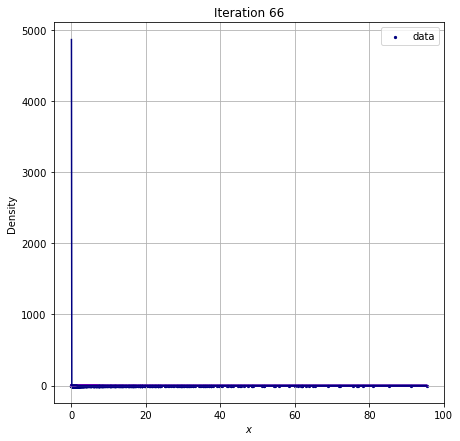

8.85 3.62 9.37 2.88
[9.91424422e-01 9.89339728e-01 1.88470204e-04 1.79435537e+01]


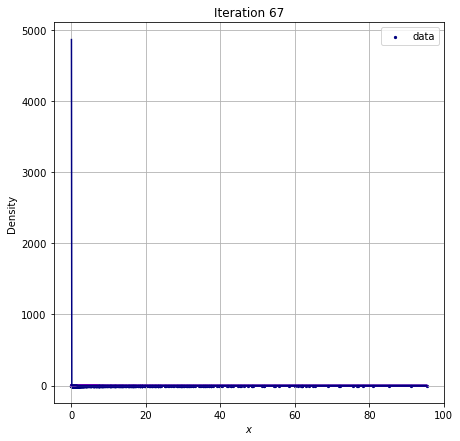

8.85 3.62 9.37 2.88
[9.91382034e-01 9.89433478e-01 1.88470204e-04 1.79435530e+01]


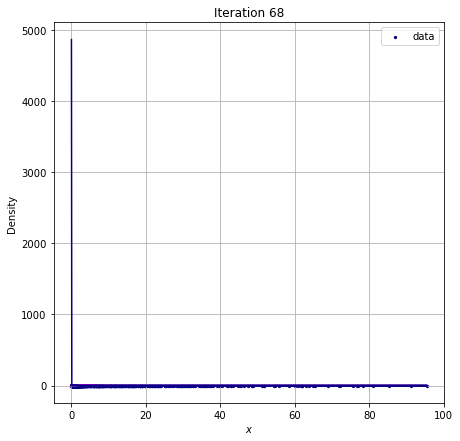

8.85 3.62 9.37 2.88
[9.91342422e-01 9.89521108e-01 1.88470205e-04 1.79435524e+01]


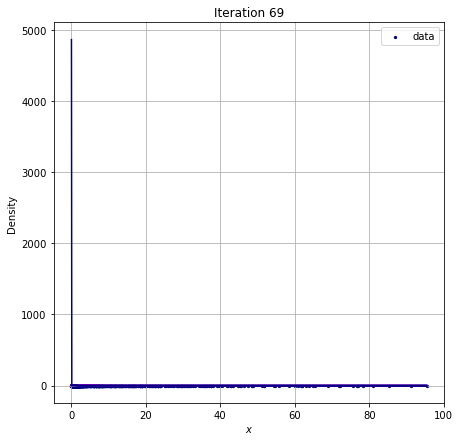

8.85 3.62 9.37 2.88
[9.91305403e-01 9.89603019e-01 1.88470205e-04 1.79435518e+01]


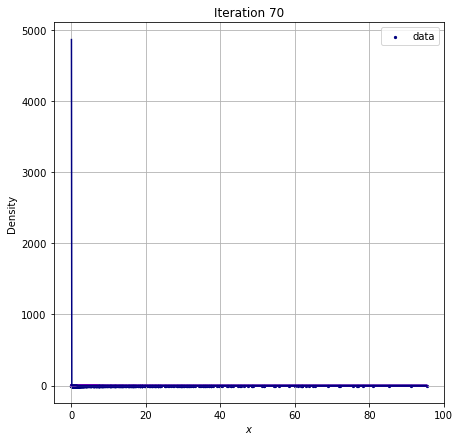

8.85 3.62 9.37 2.88
[9.91270808e-01 9.89679584e-01 1.88470205e-04 1.79435514e+01]


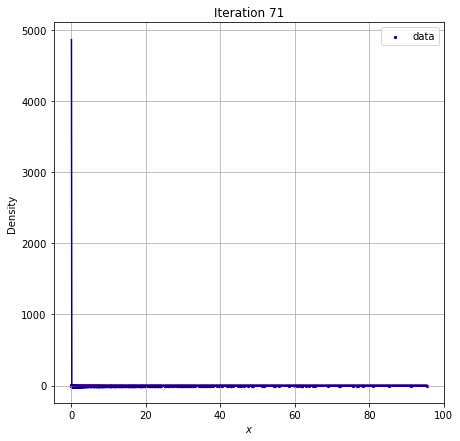

8.85 3.62 9.37 2.88
[9.91238477e-01 9.89751152e-01 1.88470206e-04 1.79435510e+01]


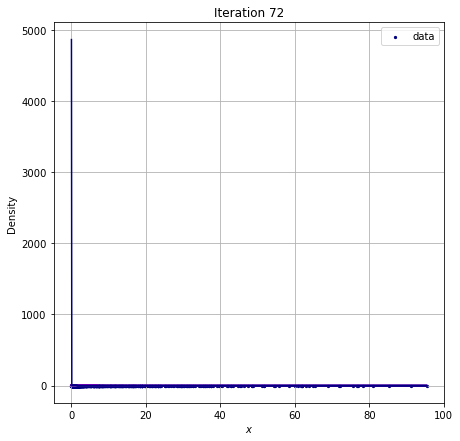

8.85 3.62 9.37 2.88
[9.91208261e-01 9.89818048e-01 1.88470206e-04 1.79435506e+01]


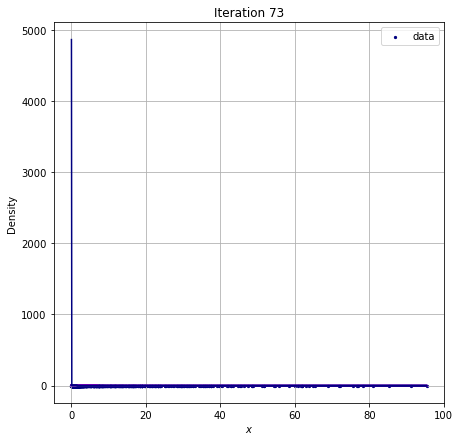

8.85 3.62 9.37 2.88
[9.91180022e-01 9.89880578e-01 1.88470206e-04 1.79435503e+01]


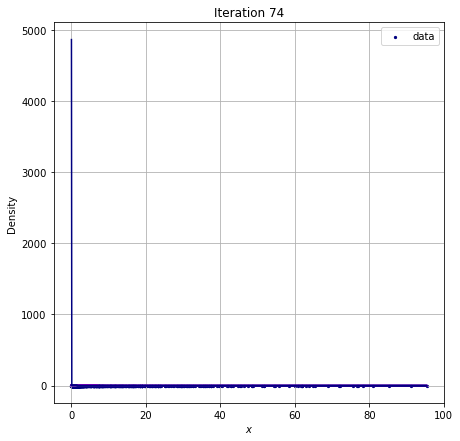

8.85 3.62 9.37 2.88
[9.91153630e-01 9.89939027e-01 1.88470206e-04 1.79435501e+01]


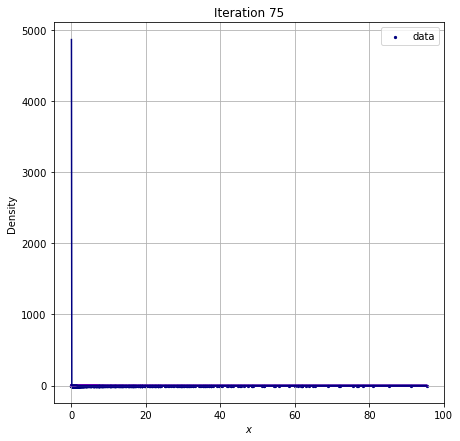

8.85 3.62 9.37 2.88
[9.91128965e-01 9.89993662e-01 1.88470207e-04 1.79435498e+01]


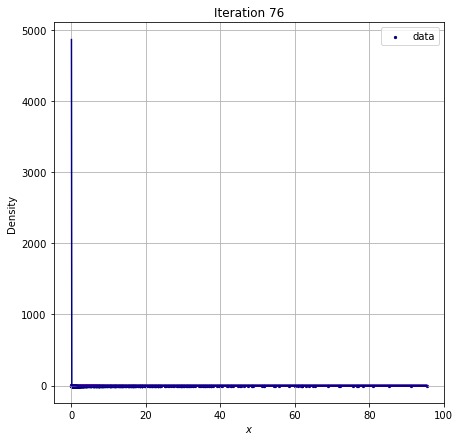

8.85 3.62 9.37 2.88
[9.91105912e-01 9.90044730e-01 1.88470207e-04 1.79435496e+01]


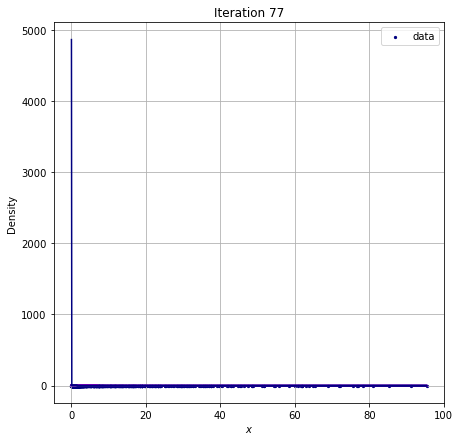

8.85 3.62 9.37 2.88
[9.91084367e-01 9.90092465e-01 1.88470207e-04 1.79435494e+01]


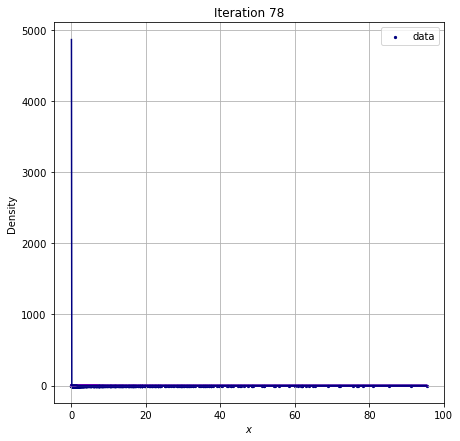

8.85 3.62 9.37 2.88
[9.91064231e-01 9.90137085e-01 1.88470207e-04 1.79435493e+01]


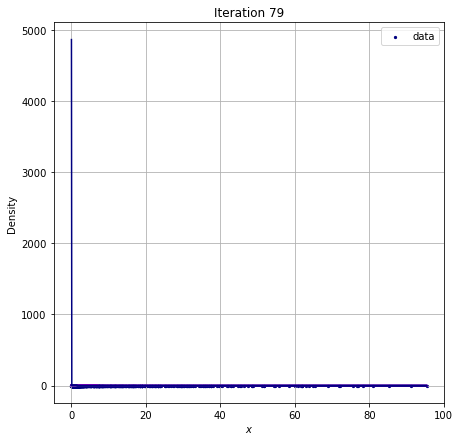

8.85 3.62 9.37 2.88
[9.91045410e-01 9.90178792e-01 1.88470207e-04 1.79435491e+01]


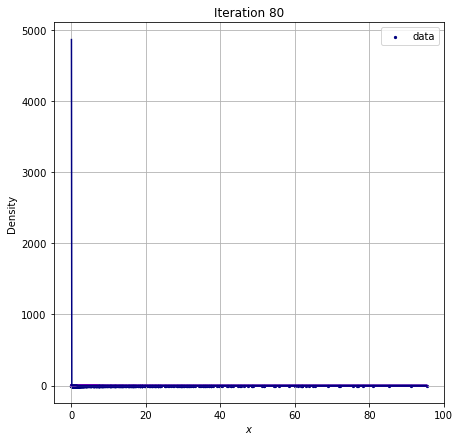

8.85 3.62 9.37 2.88
[9.91027820e-01 9.90217777e-01 1.88470207e-04 1.79435490e+01]


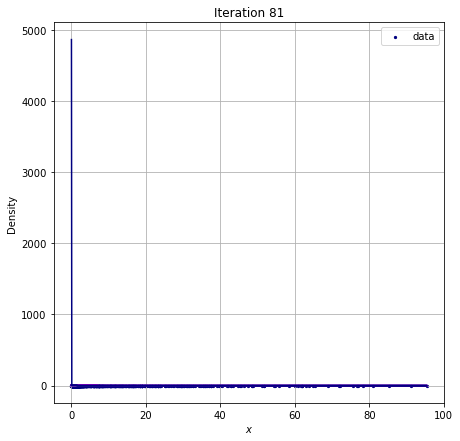

8.85 3.62 9.37 2.88
[9.91011380e-01 9.90254218e-01 1.88470207e-04 1.79435489e+01]


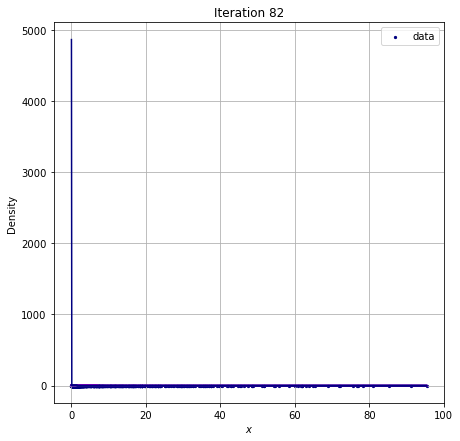

8.85 3.62 9.37 2.88
[9.90996014e-01 9.90288280e-01 1.88470207e-04 1.79435488e+01]


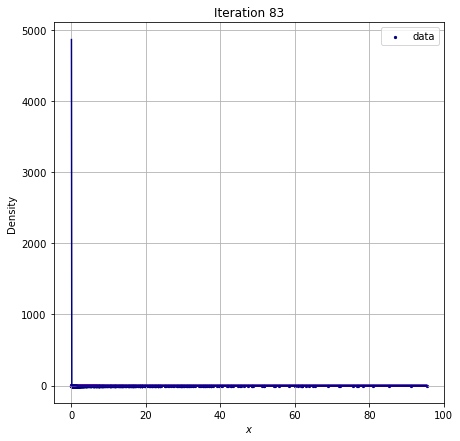

8.85 3.62 9.37 2.88
[9.90981652e-01 9.90320120e-01 1.88470207e-04 1.79435487e+01]


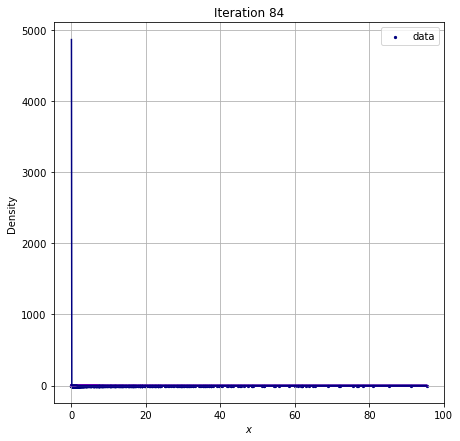

8.85 3.62 9.37 2.88
[9.90968229e-01 9.90349881e-01 1.88470207e-04 1.79435487e+01]


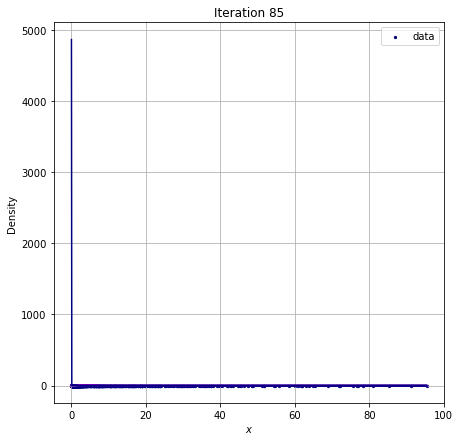

8.85 3.62 9.37 2.88
[9.90955683e-01 9.90377699e-01 1.88470207e-04 1.79435486e+01]


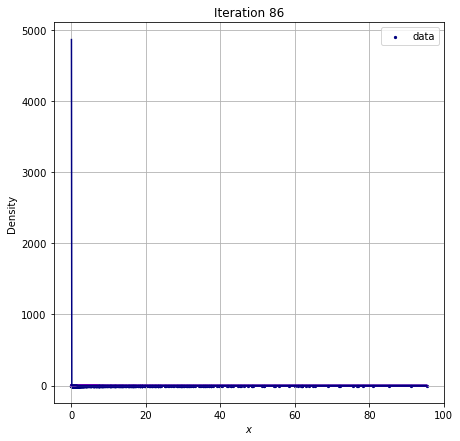

8.85 3.62 9.37 2.88
[9.90943956e-01 9.90403702e-01 1.88470207e-04 1.79435486e+01]


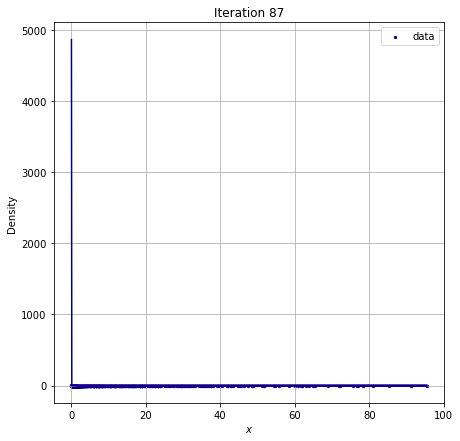

8.85 3.62 9.37 2.88
[9.90932996e-01 9.90428008e-01 1.88470207e-04 1.79435485e+01]


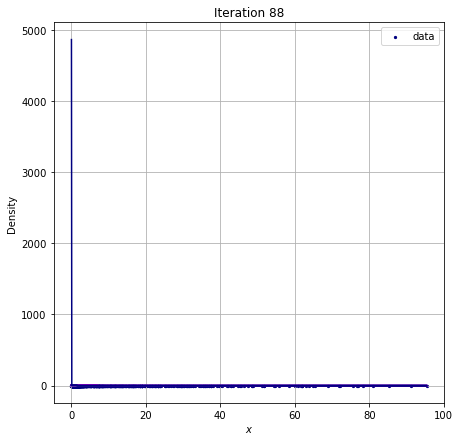

8.85 3.62 9.37 2.88
[9.90922751e-01 9.90450727e-01 1.88470208e-04 1.79435485e+01]


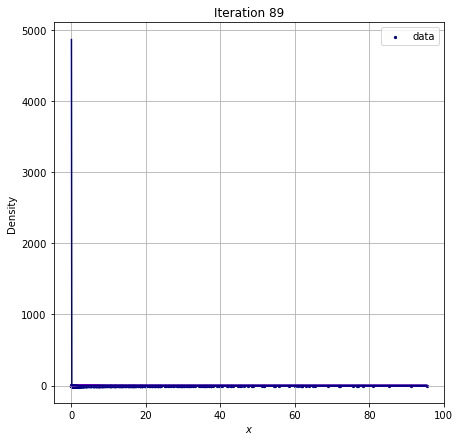

8.85 3.62 9.37 2.88
[9.90913176e-01 9.90471964e-01 1.88470208e-04 1.79435484e+01]


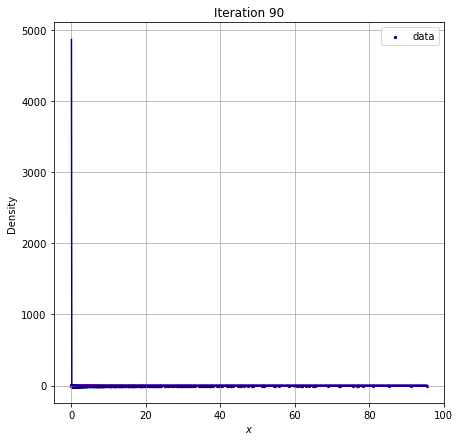

8.85 3.62 9.37 2.88
[9.90904226e-01 9.90491814e-01 1.88470208e-04 1.79435484e+01]


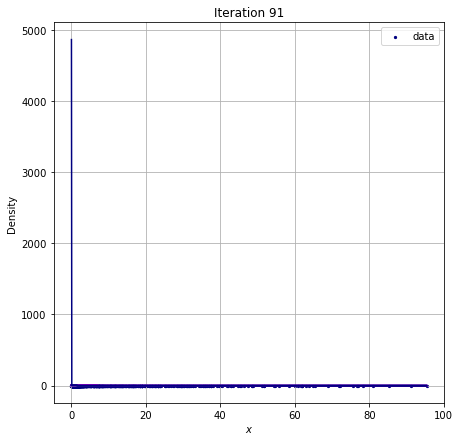

8.85 3.62 9.37 2.88
[9.90895861e-01 9.90510369e-01 1.88470208e-04 1.79435484e+01]


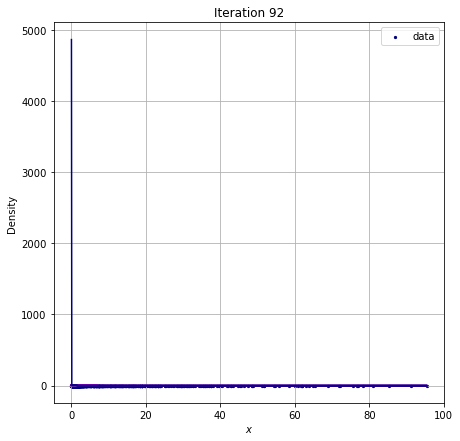

8.85 3.62 9.37 2.88
[9.90888042e-01 9.90527713e-01 1.88470208e-04 1.79435484e+01]


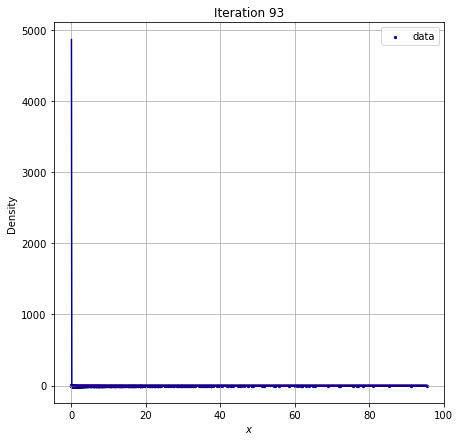

8.85 3.62 9.37 2.88
[9.90880733e-01 9.90543925e-01 1.88470208e-04 1.79435483e+01]


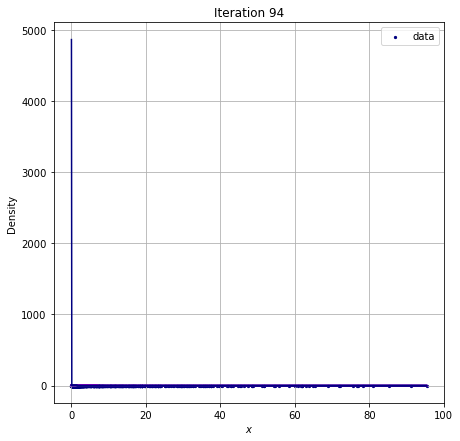

8.85 3.62 9.37 2.88
[9.90873902e-01 9.90559079e-01 1.88470208e-04 1.79435483e+01]


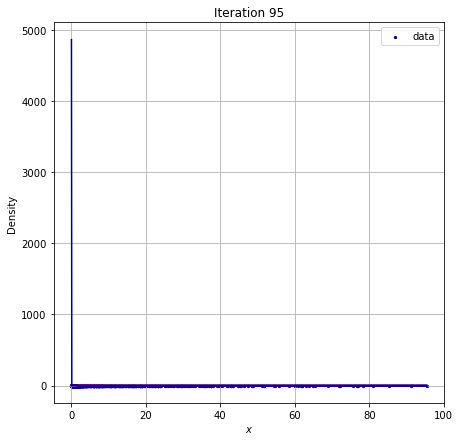

8.85 3.62 9.37 2.88
[9.90867517e-01 9.90573243e-01 1.88470208e-04 1.79435483e+01]


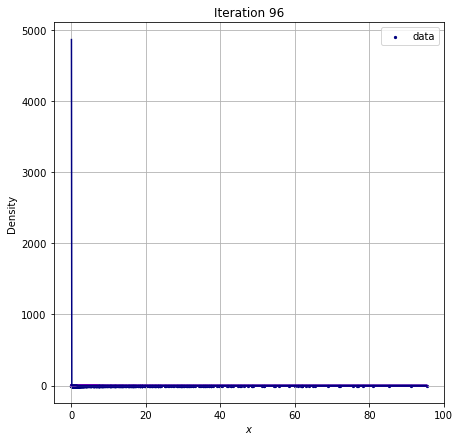

8.85 3.62 9.37 2.88
[9.90861549e-01 9.90586483e-01 1.88470208e-04 1.79435483e+01]


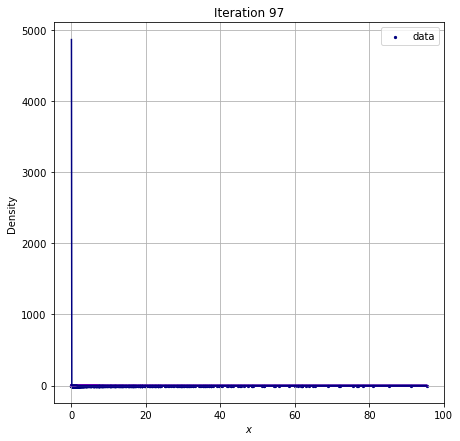

8.85 3.62 9.37 2.88
[9.90855971e-01 9.90598859e-01 1.88470208e-04 1.79435483e+01]


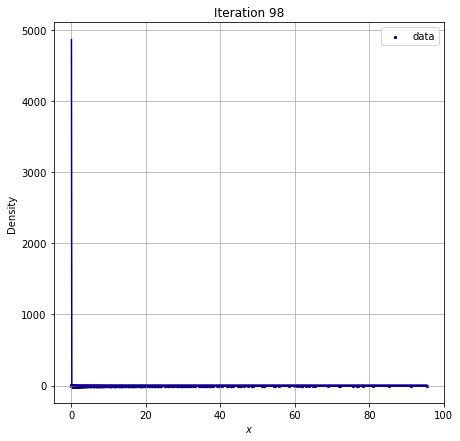

8.85 3.62 9.37 2.88
[9.90850757e-01 9.90610428e-01 1.88470208e-04 1.79435483e+01]


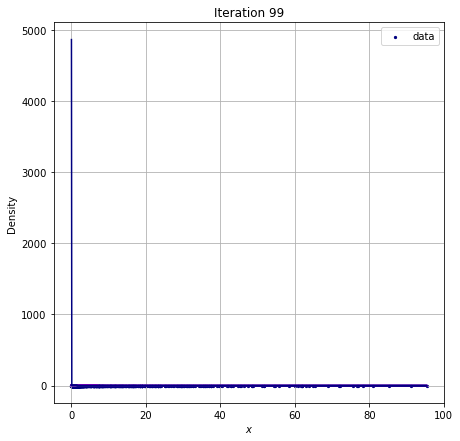

8.85 3.62 9.37 2.88
[9.90845883e-01 9.90621241e-01 1.88470208e-04 1.79435483e+01]


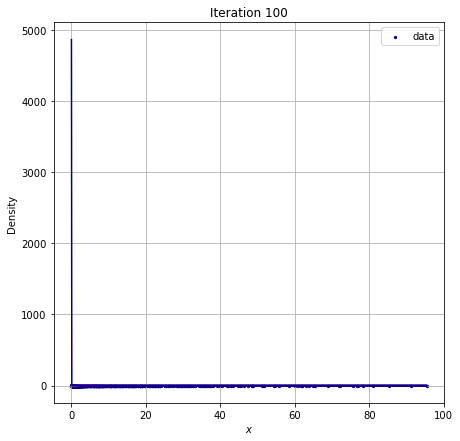

In [8]:
# Set eps to avoid divide by zero
eps = 1e-8
likelihood = []

# averaged over 100 random initializations

i_iter = 100
z_iter= 1
for i in range(1,i_iter+1):
    for z in range(1,z_iter+1):
        if i % z_iter == 0:
            plt.figure(figsize = (7,7))
            axes = plt.gca()
            plt.xlabel("$x$")
            plt.ylabel("Density")
            plt.title("Iteration {}".format(i))
            #plt.xlim(0,60)
            #plt.ylim(0,0.500)
            plt.scatter(X,[0.0005]*len(X), color = 'navy', s=5, label = 'data')

            print(mean0,mean1,mean2,mean3)
            print(means)
            plt.plot(starts, exponential_pdf(starts,mean0),color = 'magenta')
            plt.plot(starts, exponential_pdf(starts,mean1),color = 'magenta')
            plt.plot(starts, exponential_pdf(starts,mean2),color = 'magenta')
            plt.plot(starts, exponential_pdf(starts,mean3),color = 'magenta')

            plt.plot(starts, exponential_pdf(starts,means[0]),color = 'navy')
            plt.plot(starts, exponential_pdf(starts,means[1]),color = 'navy')
            plt.plot(starts, exponential_pdf(starts,means[2]),color = 'navy')
            plt.plot(starts, exponential_pdf(starts,means[3]),color = 'navy')

            plt.legend(loc = 'upper right')
            plt.grid()
            plt.show()

        density = []
        for j in range(k):
            density .append(exponential_pdf(X,means[j]))
        density = np.array(density)

        resp = []
        for j in range(k):
            resp.append( (density[j] * mix_prob[j]) / (np.sum([density[i]*mix_prob[i] for i in range(k)] ,axis = 0) + eps))

        for j in range(k):
            means[j] = np.sum(resp[j] * X)/(np.sum(resp[j]))
            variance[j] = np.sum(resp[j] * np.square(X - means[j]))/ (np.sum(resp[j] +eps))

            mix_prob[j] = np.mean(resp[j])
            
            
    # Likelihood of Exponential Mixture is n(log(lambda) - (lambda)*sum(X))

        likelihood.append(100* np.log(means[j].transpose())-((means[j].transpose())*np.sum(X)))

### Plot the log-likelihood (averaged over 100 random initializations) as a function of iterations

### Liklihood Graph

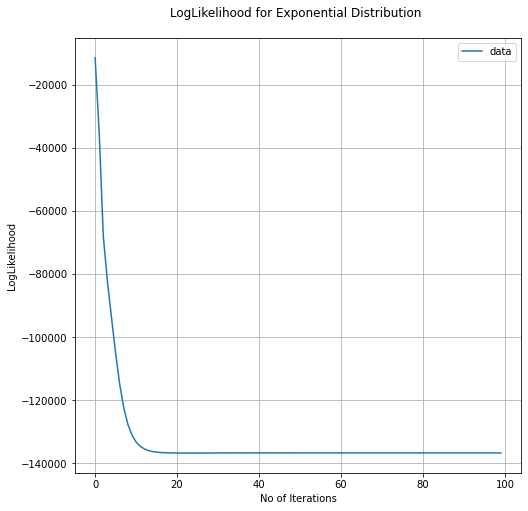

In [9]:
# Log Liklihood
plt.figure(figsize = (8,8))
#likelihood = np.reshape(likelihood,(100,100))
avg = np.mean(likelihood,axis = 0)
iterat = range(100)
plt.plot(iterat,likelihood, label = 'data')
plt.xlabel('No of Iterations')
plt.ylabel('LogLikelihood')
plt.title('LogLikelihood for Exponential Distribution \n')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()